In [1]:
# Read in CDFS main data
import pandas as pd

data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1]

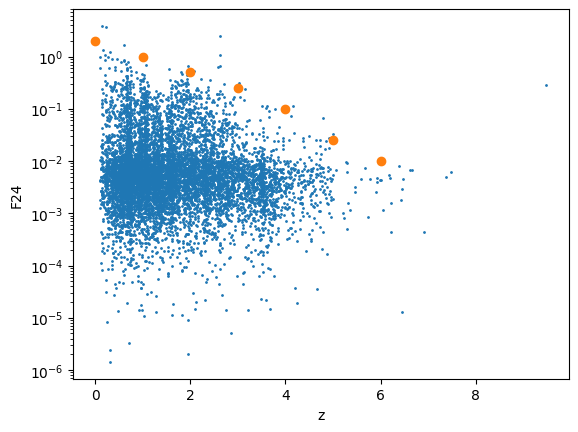

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z = df['zpk']
flux = df['F24']

x = np.array([0, 1, 2, 3, 4, 5, 6])
y = np.array([2, 1, 0.5, 0.25, 0.1, 0.025, 0.01])

plt.scatter(z, flux, s=1)
plt.scatter(x, y)
plt.ylabel('F24')
plt.xlabel('z')
plt.yscale('log')

2.032722118066327
0.669815476347139
-0.03434757837283247


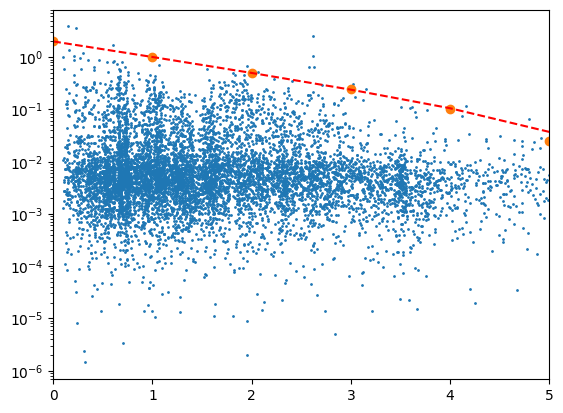

In [3]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

params, covars = curve_fit(func, x, y)

for p in params:
    print(p)

plt.scatter(z, flux, s=1, label='Data')
plt.scatter(x, y, label='Model')
plt.plot(x, func(x, *params), label='Fit', linestyle='--', color='red')
plt.yscale('log')
plt.xlim(0,5)

# y = 2.032 * np.exp(-0.669 * x) -0.034
x = np.log((y + 0.034) / 2.032) / -0.669


C:\Users\n10480129\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


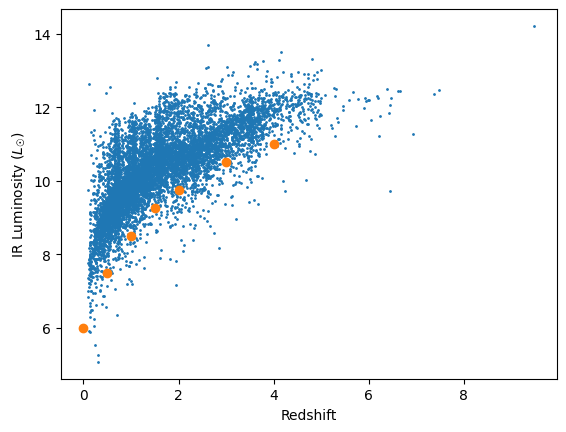

In [4]:
lir = np.log10(df['LIR'])
z = df['zpk']

x = np.array([0, 0.5, 1, 1.5, 2, 3, 4])
y = np.array([6, 7.5, 8.5, 9.25, 9.75, 10.5, 11])

plt.scatter(z, lir, s=1, label='Data')
plt.scatter(x, y, label='Model')
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.show()

5.33657441717304
0.7687994532459602
6.586252110721898
0.6526468026866075


C:\Users\n10480129\AppData\Local\Temp\ipykernel_16820\4053597058.py:4: RuntimeWarning: invalid value encountered in log10
  return a * np.log10(x/d + b) + c


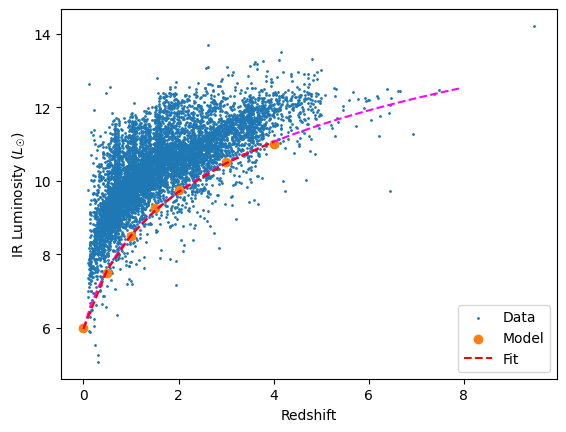

In [5]:
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    y = a * np.log10(x/d + b) + c 
    return y
    
p0 = [10, 1, 6, 1]

params, covars = curve_fit(func, x, y, p0=p0, maxfev=1000)

for p in params:
    print(p)
    
plt.scatter(z, lir, s=1, label='Data')
plt.scatter(x, y, label='Model')
plt.plot(np.arange(0, 8, 0.1), func(np.arange(0, 8, 0.1), *params), linestyle='--', color='magenta')
plt.plot(x, func(x, *params), label='Fit', linestyle='--', color='red')
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')
plt.legend()

# y = 5.336 * np.log10(x/0.652 + 0.768) + 6.586

In [ ]:
lum = np.log10(df['LIR'])
z = df['zpk']

# max_lum = 5.336 * np.log10(z/0.652 + 0.768) + 6.586
max_z = 0.652 * (10 ** ((lum - 6.586) / 5.336) - 0.768)

plt.scatter(z, lum, s=1, label='Data')
plt.scatter(max_z, lum, s=1, label='Max Data', color='red')
plt.xlim(0, 8)
plt.xlabel('Redshift')
plt.ylabel('IR Luminosity ($L_{☉}$)')


[0.00153823 0.00118778 0.00115716 0.00127552 0.00110939 0.00135933
 0.0020966  0.00267259 0.0030489  0.00314106 0.00220412 0.00153597
 0.00097534 0.00073727 0.00056063 0.00044543 0.00023808 0.00014592]
9.124896131189441
0.0068364111286263645
-0.30890320277596295


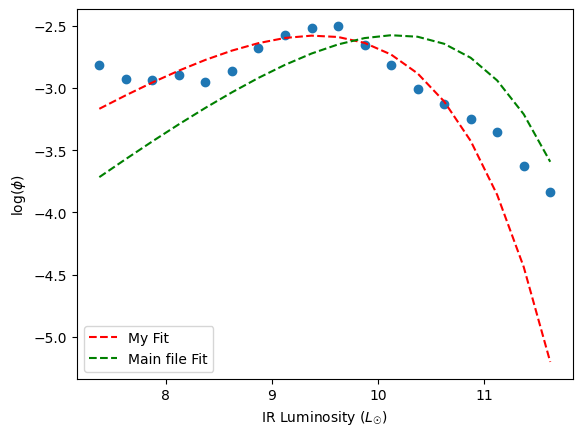

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def schecter_luminosity(L, L_star, phi_star, alpha):
    return phi_star * 10 ** (-0.4*(1-alpha)*(L_star-L)) * np.exp(-10.**(-0.4*(L_star-L)))

x = np.array([7.375,  7.625,  7.875,  8.125,  8.375,  8.625,  8.875,  9.125,  9.375,  9.625,
  9.875, 10.125, 10.375, 10.625, 10.875, 11.125, 11.375, 11.625])
y = np.array([0.00153823, 0.00118778, 0.00115716, 0.00127552, 0.00110939, 0.00135933,
 0.0020966, 0.00267259, 0.0030489,  0.00314106, 0.00220412, 0.00153597,
 0.00097534, 0.00073727, 0.00056063, 0.00044543, 0.00023808, 0.00014592])
print(y)

p0 = [x[0], 0.001, -0.9]

params, covars = curve_fit(schecter_luminosity, x, y, p0=p0)

for i in params:
    print(i)

plt.scatter(x, np.log10(y))
plt.plot(x, np.log10(schecter_luminosity(x, *params)), linestyle='--', color='red', label='My Fit')
plt.plot(x, np.log10(schecter_luminosity(x, *[9.67, 0.00622, -0.588])), linestyle='--', color='green', label='Main file Fit')
plt.xlabel('IR Luminosity ($L_{☉}$)')
plt.ylabel('log($\phi$)')
plt.legend()
plt.show()